# Задание 2

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

Загрузим данные из файла second.csv, добавить столбец со среднеми промежутками и столбец с вероятностями попадания, построить гистограмму

   left  right   n    avg  n_i/n
0  29.5   31.0   2  30.25  0.010
1  31.0   32.5   3  31.75  0.015
2  32.5   34.0  16  33.25  0.080
3  34.0   35.5  23  34.75  0.115
4  35.5   37.0  47  36.25  0.235
5  37.0   38.5  47  37.75  0.235
6  38.5   40.0  34  39.25  0.170
7  40.0   41.5  19  40.75  0.095
8  41.5   43.0   7  42.25  0.035
9  43.0   44.5   2  43.75  0.010


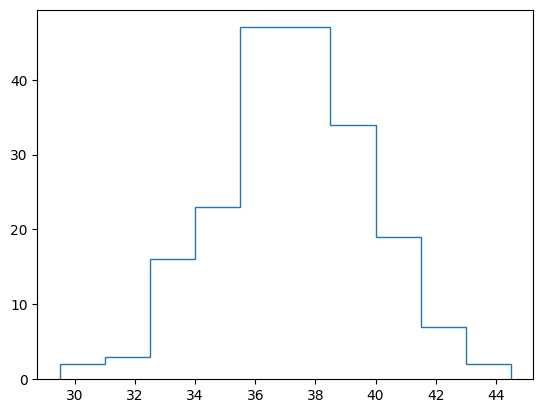

In [2]:
data = pd.read_csv('second.csv')
data['avg'] = (data['left'] + data['right']) / 2
data['n_i/n'] = data['n'] / data['n'].sum()
merged = pd.concat([data['left'], data['right']]).drop_duplicates()
plt.stairs(data['n'], merged);
print(data)

Случайная величина имеет нормальное распределение
Берем 37 как ложный нуль
Получим дисперсию и мат ожидание методом моментов

In [3]:
avg = 37.0
data['normalised'] = data['avg'] - avg
data['normalised * n'] = data['normalised'] * data['n']
data['normalised square * n'] = data['n'] * data['normalised'] ** 2
expected = avg + data['normalised * n'].sum() / data['n'].sum()
sigma = (data['normalised square * n'].sum() / data['n'].sum() + (data['normalised * n'].sum() / data['n'].sum()) ** 2) ** 0.5
print(f'приближенно выборочное среднее {expected}, дисперсия {sigma ** 2}')

приближенно выборочное среднее 37.285, дисперсия 6.5387249999999995


Построим график нормального распределения с полученными параметрами

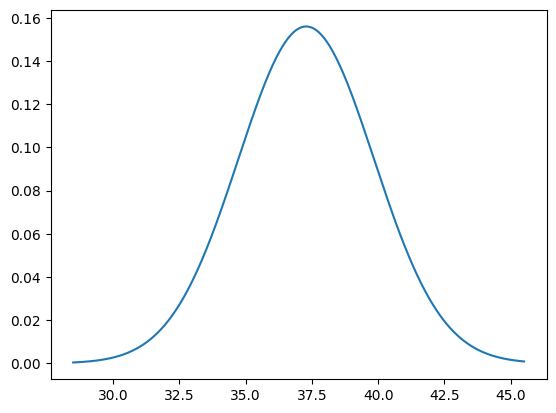

In [4]:
distribution = lambda x : np.e ** (-0.5 * ((x - expected) / sigma) ** 2) / \
                          (sigma * np.sqrt(2 * np.pi))
space = np.linspace(data.loc[data['left'].idxmin()]['left'] - 1, data.loc[data['right'].idxmax()]['right'] + 1, 10000)
vfunc = np.vectorize(distribution)
plt.plot(space, vfunc(space));